# Task I: Quantum Computing Part 

## Implement a simple quantum operation with Cirq or Pennylane
1. With 5 qubits 
2. Apply Hadamard operation on every qubit 
3. Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4) 
4. SWAP (0, 4) 
5. Rotate X with pi/2 on any qubit 
6. Plot the circuit 

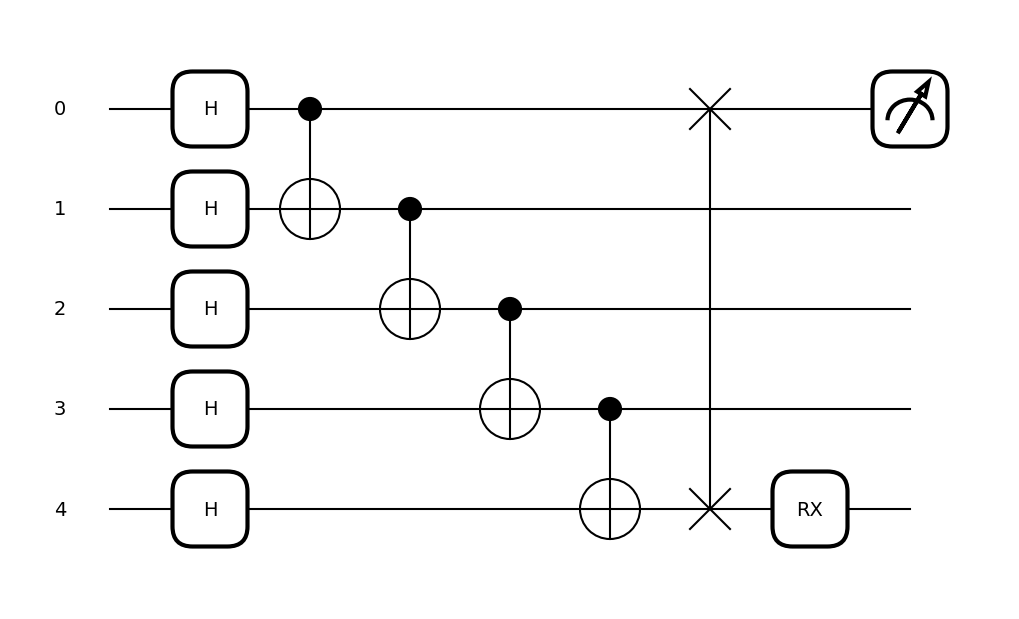

In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Create a quantum device with 5 qubits
dev = qml.device("default.qubit", wires=5)

# Define the quantum function to construct the circuit
@qml.qnode(dev)
def quantum_circuit(angle,qubit):
    # Apply Hadamard operation on every qubit
    for wire in range(5):
        qml.Hadamard(wires=wire)
    
    # xwApply CNOT operations
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 4])
    
    # SWAP (0, 4)
    qml.SWAP(wires=[0, 4])
    
    # Rotate X with pi/2 on any qubit
    qml.RX(angle, wires=qubit)
    
    return qml.expval(qml.PauliZ(0))  # Example measurement

# Visualize the circuit
qml.draw_mpl(quantum_circuit)(np.pi / 2, 4)
plt.show()

## Implement a second circuit with a framework of your choice:
1. Apply a Hadmard gate to the first qubit
2. rotate the second qubit by pi/3 around X
3. Apply Hadamard gate to the third and fourth qubit
4. Perform a swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>

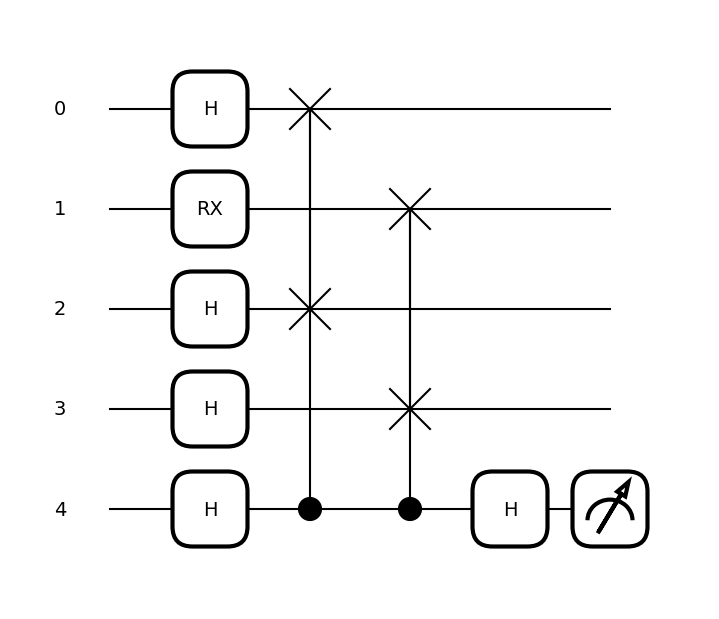

The outcome probability of ancilla qubit is: [0.75 0.25]


In [33]:
# Create a quantum device with 5 qubits
device = qml.device("default.qubit", wires=5, shots=1024)

# Define the quantum function to construct the circuit
@qml.qnode(device)
def circuit(angle):
    # Apply Hadamard operation on the first qubit
    qml.Hadamard(wires=0)

    # Rotate the second qubit by designated angle
    qml.RX(angle, wires=1)

    # Apply Hadamard operation on the third and fourth qubit
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)

    # Perform a swap test
    # Apply Hadamard to the ancilla qubit
    qml.Hadamard(wires=4)
    # Controlled-swap operations comparing q1 & q2, q2 & q4
    qml.CSWAP(wires=[4, 0, 2])
    qml.CSWAP(wires=[4, 1, 3])
    # Apply another Hadamard to the ancilla qubit
    qml.Hadamard(wires=4)
        
    return qml.probs(wires=4)  # Example measurement

# Visualize the circuit
qml.draw_mpl(circuit)(np.pi / 3)
plt.show()

# Run the circuit
print("The outcome probability of ancilla qubit is:", circuit(np.pi / 3))

# Task II: Classical Graph Neural Network (GNN) 

For Task II, you will use ParticleNet’s data for Quark/Gluon jet classification available [here](https://zenodo.org/records/3164691#.YigdGt9MHrB) with its corresponding description.
- Choose 2 Graph-based architectures of your choice to classify jets as being quarks or gluons. Provide a description on what considerations you have taken to project this point-cloud dataset to a set of interconnected nodes and edges. 
- Discuss the resulting performance of the 2 chosen architectures.


In [3]:
!wget -qq "https://zenodo.org/record/3164691/files/QG_jets.npz"

In [5]:
import numpy as np
import pandas as pd

In [6]:
#Load Dataset
temp = np.load('data/QG_jets.npz')

In [7]:
print(temp.files)

['X', 'y']


In [9]:
print(len(temp["X"]))

100000


In [10]:
print((temp["y"]))

[1. 1. 1. ... 1. 0. 0.]


array([[<Axes: title={'center': '0'}>]], dtype=object)

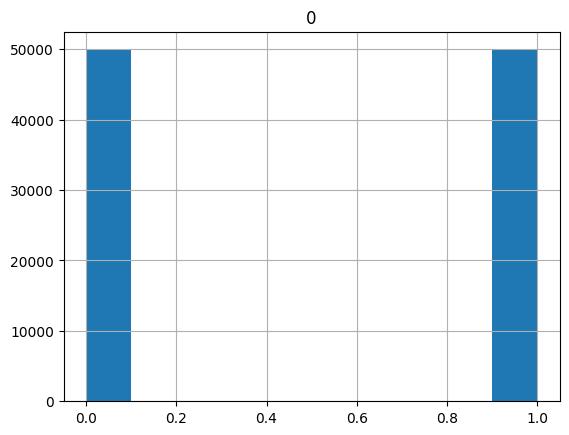

In [11]:
y=pd.DataFrame(temp["y"])

y.hist()

In [12]:
X=[]
for i in temp["X"]:
    X.append(i[0])
X=pd.DataFrame(X,columns=["pt","eta","azimuthal","pgdid"])
y=pd.DataFrame(temp["y"],columns=["Y"])
X["y"]=y
#X=X.sample(frac=0.5, replace=False, random_state=1)

In [13]:
X.head(10)
#print(len(X))

,pt,eta,azimuthal,pgdid,y
0,0.268769,0.356903,4.741387,22.0,1.0
1,1.212663,-0.112853,3.047088,-211.0,1.0
2,0.216829,-0.997057,0.532569,22.0,1.0
3,0.413806,0.956889,5.742566,211.0,1.0
4,0.476434,-0.403307,4.126747,22.0,1.0
5,7.702450,-0.819775,5.794888,321.0,0.0
6,0.235739,-1.094473,5.626174,211.0,1.0
7,0.317746,0.245092,1.284100,211.0,1.0
8,0.879651,0.109774,3.468267,211.0,1.0
9,0.160245,-1.455975,3.670505,22.0,1.0


# Task III: Open Task

Please comment on quantum computing or quantum machine learning. You can also comment on one quantum algorithm or one quantum software you are familiar with. You can also suggest methods you think are good and you would like to work on. Please use your own understanding. Comments copied from the internet will not be considered.

Quantum computing dan quantum machine learning tengah menjadi perbincangan yang hangat di kalangan akademisi dan industri. konsep komputasi yang baru ini membawa angin segar dalam cara kita memproses informasi, memecahkan masalah kompleks, dan memahami dunia kuantum. quantum computing digadang-gadang menjadi solusi sapu jagad atas segalam masalah yang ada di dunia ini. akan tetapi komputer kuantum tidak akan menggantikan komputer klasik yang ada saat ini, karena cara kerja yang berbeda, komputer kuantum akan berperan menjadi pelengkap dari komputer klasik yang kita miliki. 

dari sekian banyak aplikasi komputer kuantum, terdapat dua bidang yang sangat ramai diperbincangkan, yakni quantum simulation dan optimization. `